### Persistance images from small values

In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips
from persim import PersistenceImager
import glob
import pickle

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [5]:
# import the data
data = []
for file in glob.glob("./tennessee/results/selected coordinates for each county/*.pkl"):
    with open(file, 'rb') as f:
        data.append(pickle.load(f))

In [6]:
# add the data(coordinates) to the list - for a single county - multiple variable
data_coordinates_list = []
for variable_name, selected_coordinates in data[7].items():
    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    print(f"Variable: {variable_name}")
    print(data_coordinates.shape)

    # append the data to the list
    data_coordinates_list.append(data_coordinates)

Variable: EP_DISABL
(80, 2)
Variable: EP_NOHSDP
(0,)
Variable: EP_PCI
(48, 2)
Variable: EP_MOBILE
(112, 2)
Variable: EP_POV
(42, 2)


In [7]:
# selecting single variable to plot
data_ep_pci = data_coordinates_list[2]

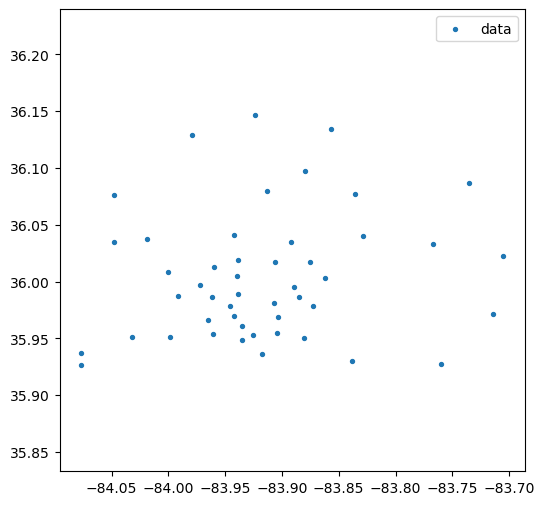

In [8]:
# plot the data_ep_pci for the county
plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data_ep_pci[:,0], data_ep_pci[:,1], label="data", s=8)
plt.axis('equal')
plt.legend()
plt.show()

##### Persistance image 

In [9]:
# creating the persistence diagram from rips class
rips = Rips(maxdim=1, coeff=2)
dgms = rips.fit_transform(data_ep_pci)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [10]:
# seperate the diagrams H0 and H1
diagrams_h0 = dgms[0]
diagrams_h1 = dgms[1]

In [11]:
# remove last data point in H0 diagram - it is infinity
diagrams_h0_without_inf = diagrams_h0[0:-1]

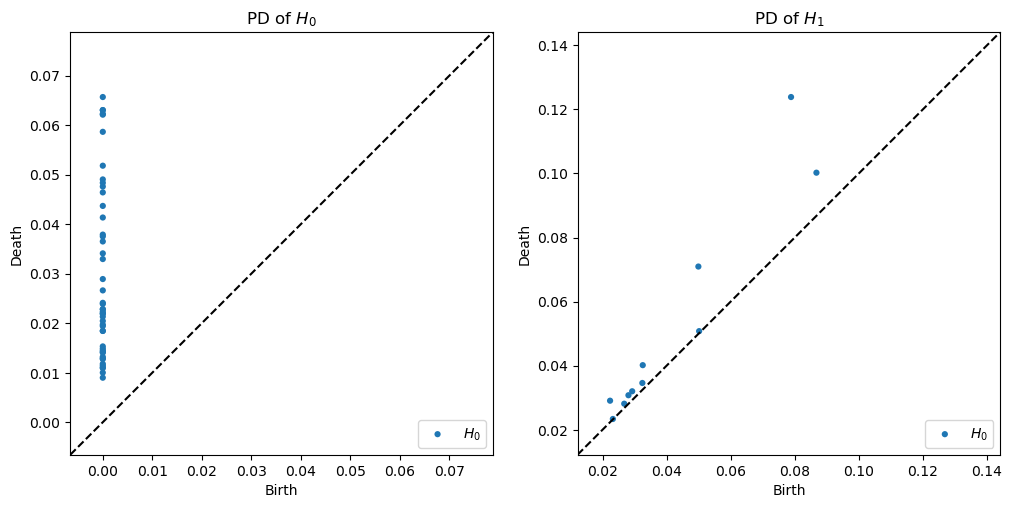

In [12]:
# plotting the persistence diagram of H0 and H1
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0_without_inf, show=False)
plt.title("PD of $H_0$")

plt.subplot(122)
rips.plot(diagrams_h1, show=False)
plt.title("PD of $H_1$")

plt.show()

In [13]:
# lifetime is y coordinates diagrams_h0_without_inf
# only if used as weight in the persistence imager
lifetime = diagrams_h1[:,1]

In [14]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [15]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
# pimgr = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': lifetime})

##### Persistence image of H1 

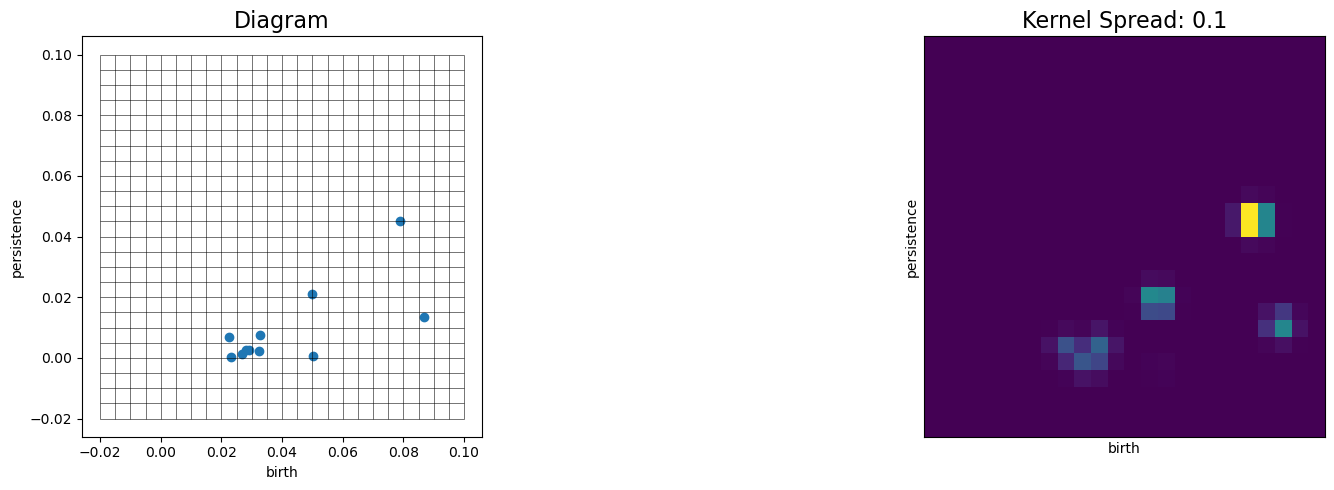

In [16]:
pimgr_1 = PersistenceImager(pixel_size=0.1)
pimgr_1.fit(diagrams_h1)

pimgr_1.pixel_size = 0.005
pimgr_1.birth_range = (-0.02, 0.1)
pimgr_1.pers_range = (-0.02, 0.1)


fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr_1.kernel_params = {'sigma': .1}
pimgr_1.plot_diagram(diagrams_h1, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr_1.kernel_params = {'sigma': 0.000005}
pimgr_1.plot_image(pimgr_1.transform(diagrams_h1), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

##### Experiment to get better detailed images

Experiment: Pixel size 

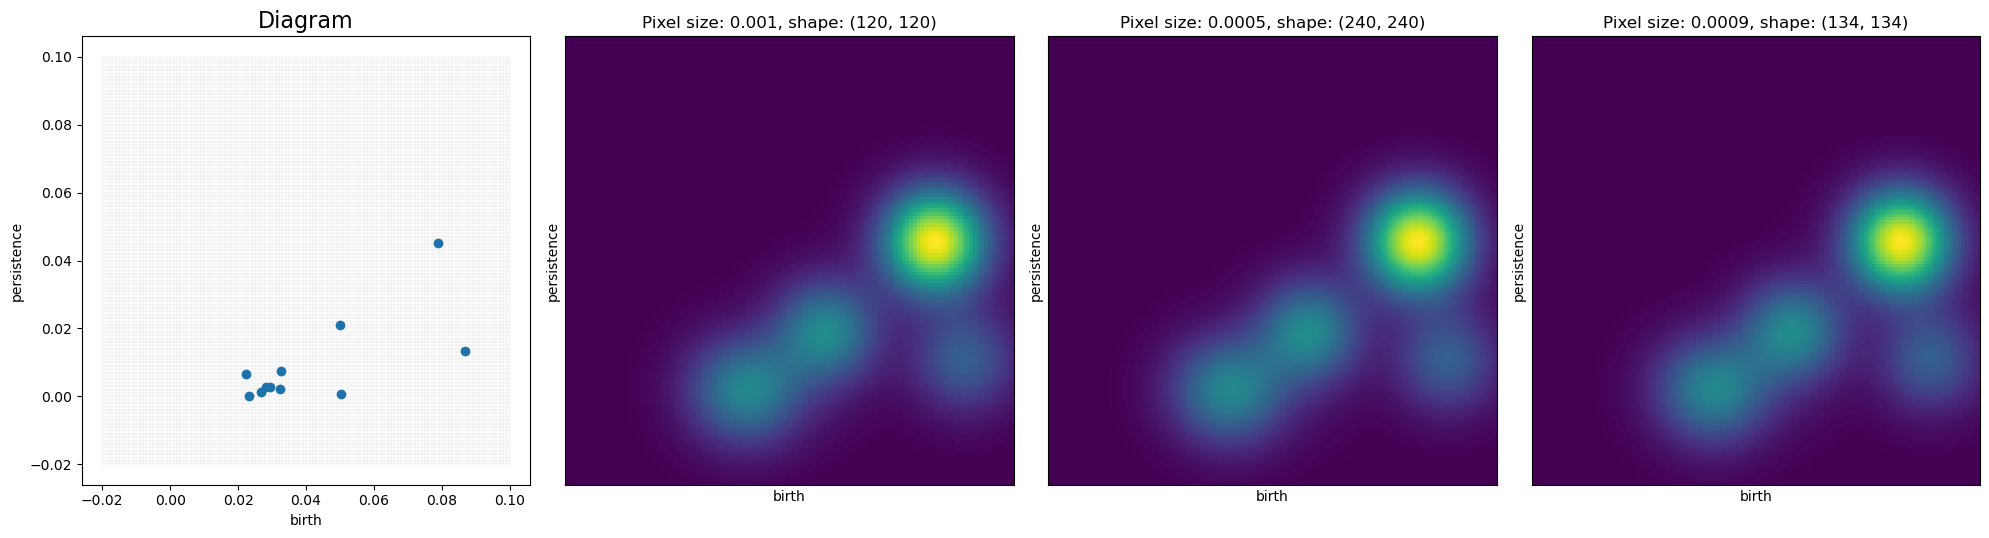

In [17]:
pimgr_test = PersistenceImager(pixel_size=0.001)
pimgr_test.fit(diagrams_h1)

pimgr_test.birth_range = (-0.02, 0.1)
pimgr_test.pers_range = (-0.02, 0.1)

fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr_test.kernel_params = {'sigma': .00009}
pimgr_test.plot_diagram(diagrams_h1, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr_test.pixel_size = 0.001
pimgr_test.kernel_params = {'sigma': 0.00009}
pimgr_test.plot_image(pimgr_test.transform(diagrams_h1), ax=axs[1])
axs[1].set_title(f'Pixel size: 0.001, shape: {pimgr_test.transform(diagrams_h1).shape}', fontsize=12)

pimgr_test.pixel_size = 0.0005
pimgr_test.kernel_params = {'sigma': .00009}
pimgr_test.plot_image(pimgr_test.transform(diagrams_h1), ax=axs[2])
axs[2].set_title(f'Pixel size: 0.0005, shape: {pimgr_test.transform(diagrams_h1).shape}', fontsize=12)

pimgr_test.pixel_size = 0.0009
pimgr_test.kernel_params = {'sigma': .00009}
pimgr_test.plot_image(pimgr_test.transform(diagrams_h1), ax=axs[3])
axs[3].set_title(f'Pixel size: 0.0009, shape: {pimgr_test.transform(diagrams_h1).shape}', fontsize=12)

plt.tight_layout()
plt.show()

Experiment: Sigma (kernel spread)

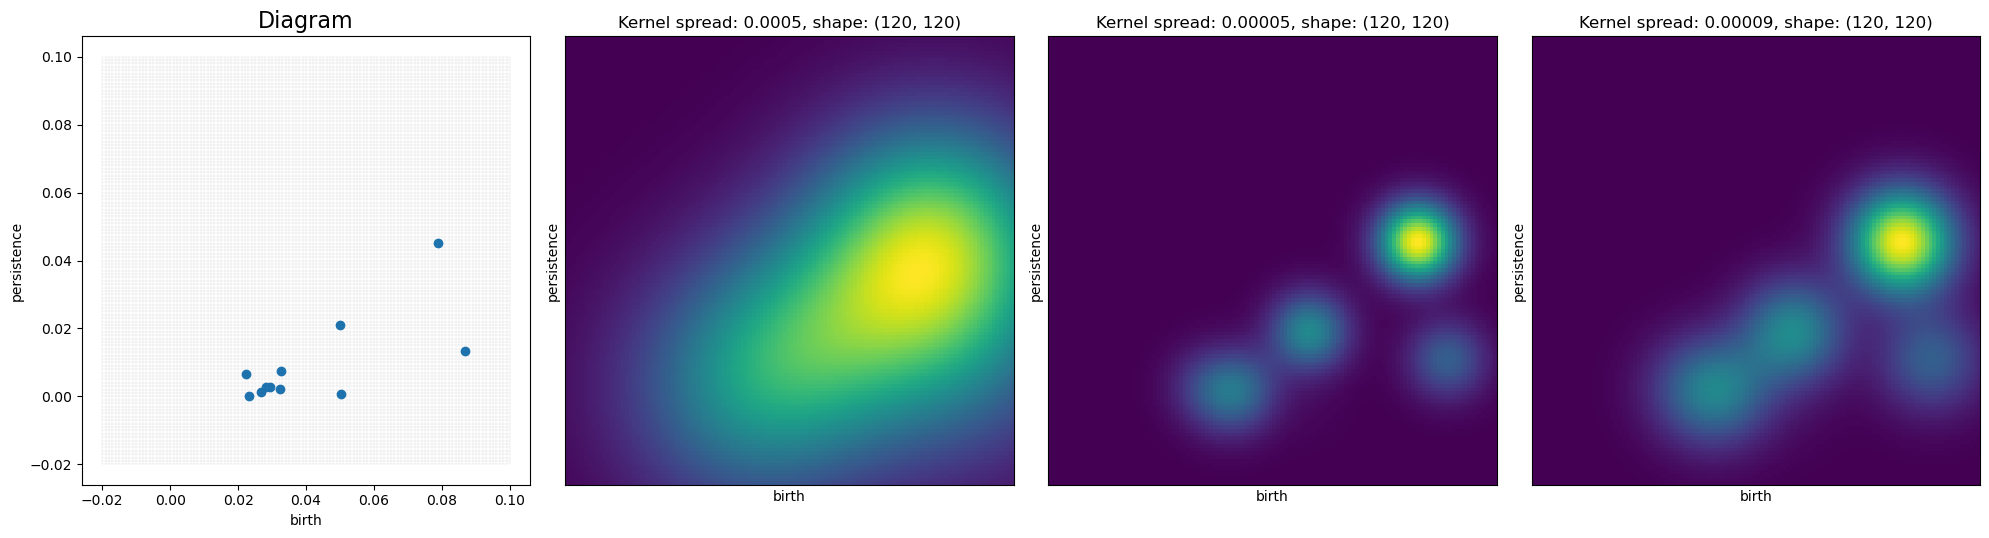

In [18]:
pimgr_test = PersistenceImager(pixel_size=0.001)
pimgr_test.fit(diagrams_h1)

# pimgr_test.birth_range = (0, 0.31)
# pimgr_test.pers_range = (0, 0.31)
pimgr_test.birth_range = (-0.02, 0.1)
pimgr_test.pers_range = (-0.02, 0.1)

fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr_test.kernel_params = {'sigma': .1}
pimgr_test.plot_diagram(diagrams_h1, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr_test.kernel_params = {'sigma': 0.0005}
pimgr_test.plot_image(pimgr_test.transform(diagrams_h1), ax=axs[1])
axs[1].set_title(f'Kernel spread: 0.0005, shape: {pimgr_test.transform(diagrams_h1).shape}', fontsize=12)

pimgr_test.kernel_params = {'sigma': .00005}
pimgr_test.plot_image(pimgr_test.transform(diagrams_h1), ax=axs[2])
axs[2].set_title(f'Kernel spread: 0.00005, shape: {pimgr_test.transform(diagrams_h1).shape}', fontsize=12)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr_test.kernel_params = {'sigma': .00009}
pimgr_test.plot_image(pimgr_test.transform(diagrams_h1), ax=axs[3])
axs[3].set_title(f'Kernel spread: 0.00009, shape: {pimgr_test.transform(diagrams_h1).shape}', fontsize=12)

plt.tight_layout()
plt.show()

For now choosing kernel spread as 0.00005 and pizel size as 0.001 \
Size of the matrix changes with the choice of range

In [19]:
pimgr_test = PersistenceImager(pixel_size=0.001)
pimgr_test.fit(diagrams_h1)

pimgr_test.birth_range = (-0.02, 0.1)
pimgr_test.pers_range = (-0.02, 0.1)

pimgr_test.kernel_params = {'sigma': .00005}

a = pimgr_test.transform(diagrams_h1)
a_rotated = np.rot90(a, k=1)

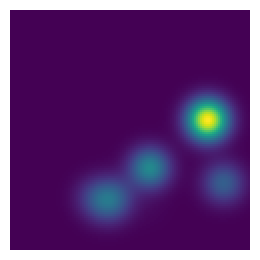

In [20]:
plt.figure(figsize=(2.4, 2.4))
plt.imshow(a_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
# plt.savefig('./tennessee/results/persistence images/test.png')
# plt.close()

plt.show()

In [21]:
# later

##### Experiment: weights

Pixel size and Kernel spread(sigma) - Constant

##### Experiment: Normal png Vs Matrix-1Channel Vs PIL image Vs combined Matrix(3 Channels or more)

Saving Normal Matrix(normal_rotated) to PNG

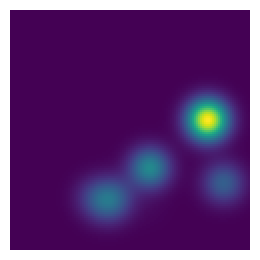

In [22]:
# saving the persistence image to PNG and importing and checking the data
pimgr_test = PersistenceImager(pixel_size=0.001)
pimgr_test.fit(diagrams_h1)

pimgr_test.birth_range = (-0.02, 0.1)
pimgr_test.pers_range = (-0.02, 0.1)

pimgr_test.kernel_params = {'sigma': .00005}

a = pimgr_test.transform(diagrams_h1)
normal_rotated = np.rot90(a, k=1)

plt.figure(figsize=(2.4, 2.4))
plt.imshow(normal_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
# plt.savefig('/Users/h6x/ORNL/git/opioid-risk-modeling/tennessee/results/experiments/test_import.png')
plt.show()
plt.close()

Saving it to a combined Matrix

In [23]:
combined_matrix = np.stack((normal_rotated, normal_rotated, normal_rotated), axis=-1)

Importing the PNG

Importib npy file as a PIL Image

In [53]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


to_pil = transforms.ToPILImage()
img = to_pil(combined_matrix)

Check the differences

In [27]:
# normal_rotated - Normal single channel image
# combined_matrix - Combined e channel matrix
# img - PIL image imported as npy(here combined_matrix) - same thing

Normal Matrix

In [42]:
# get the location of the highest value in the matrix
print(np.where(normal_rotated == np.min(normal_rotated)))

(array([35]), array([25]))


In [44]:
# normal_rotated
print(normal_rotated.shape)
print("Max", normal_rotated[54][98]) #max value

print("Min",normal_rotated[35][25]) #min value

(120, 120)
Max 0.00014251583281522497
Min -4.420450589709202e-21


PIL Image

https://pytorch.org/vision/main/generated/torchvision.transforms.ToPILImage.html

Converts a torch.*Tensor of shape C x H x W or a numpy ndarray of shape H x W x C to a PIL Image while adjusting the value range depending on the mode.

color space and pixel depth of input data (optional). If mode is None (default) there are some assumptions made about the input data:

In [57]:
image_array = np.array(img)

# Now 'image_array' contains the image matrix
print(image_array.shape)

(120, 120, 3)


In [58]:
# get the location of the highest value in the matrix
print(np.where(image_array == np.min(image_array)))

(array([  0,   0,   0, ..., 119, 119, 119]), array([  0,   0,   0, ..., 119, 119, 119]), array([0, 1, 2, ..., 0, 1, 2]))


In [59]:
image_array[35][25][1]

0

In [60]:
image_array[54][98][1]

0

In [65]:
image_array[98][54][0]

0